# Multi Linear Regression Assignment
## 50 Startups Data
Prepare a prediction model for profit of 50_startups data.\
Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

In [41]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Description

- R&D Spend -- Research and devolop spend in the past few years
- Administration -- spend on administration in the past few years
- Marketing Spend -- spend on Marketing in the past few years
- State -- states from which data is collected
- Profit  -- profit of each state in the past few years

In [42]:
data = pd.read_csv('50_Startups.csv')
print('shape of data is: ',data.shape)
data.head()

shape of data is:  (50, 5)


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Checking for null values
We can see that there are no null values in dataset

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Removing unneccessary column
We can notice that column **State** is categorical variable and not suitable for linear regression model.

In [44]:
data.drop('State', axis=1, inplace=True)

### Data Visualization

##### Histograms and Scatterplots of all variables. Also we calculate correlation coefficient between all columns

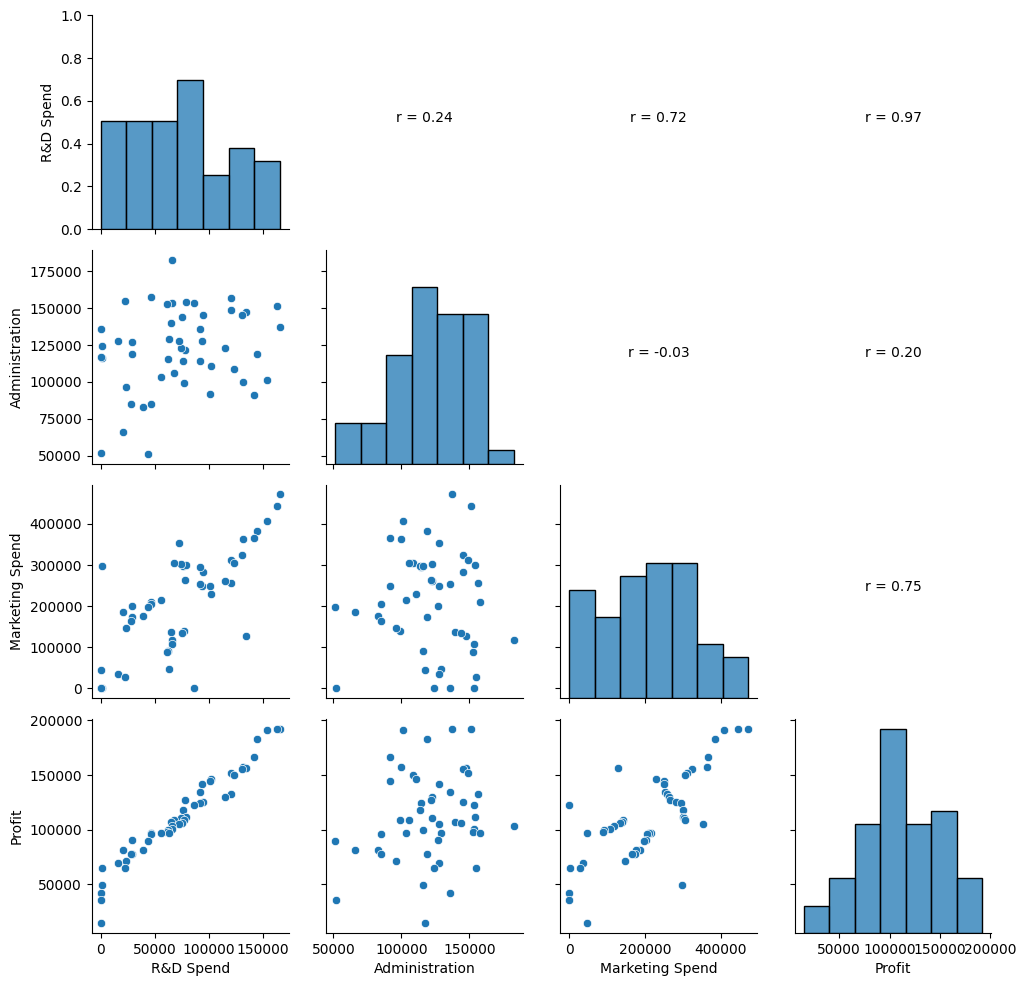

In [45]:
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(reg_coef)

### Building raw models

Renaming column names to ease up writing names for model

In [46]:
data.rename(columns={'R&D Spend':'RD', 'Administration':'AD', 'Marketing Spend':'MS', 'Profit':'PR'}, inplace=True)

We will use combination of variables to make different models

In [47]:
model = smf.ols('PR~RD+AD+MS', data=data).fit()
print(model.params)
print('rsquared: ',model.rsquared)
print('adjusted rsquared: ', model.rsquared_adj)
print('aic: ',model.aic)

Intercept    50122.192990
RD               0.805715
AD              -0.026816
MS               0.027228
dtype: float64
rsquared:  0.9507459940683246
adjusted rsquared:  0.9475337762901719
aic:  1058.7714985998055


In [48]:
model_rd = smf.ols('PR~RD', data=data).fit()
print(model_rd.params)
print('rsquared: ',model_rd.rsquared)
print('adjusted rsquared: ', model_rd.rsquared_adj)
print('aic: ',model_rd.aic)

Intercept    49032.899141
RD               0.854291
dtype: float64
rsquared:  0.9465353160804392
adjusted rsquared:  0.9454214684987816
aic:  1058.8730295624773


In [49]:
model_rdms = smf.ols('PR~RD+MS', data=data).fit()
print(model_rdms.params)
print('rsquared: ',model_rdms.rsquared)
print('adjusted rsquared: ', model_rdms.rsquared_adj)
print('aic: ',model_rdms.aic)

Intercept    46975.864221
RD               0.796584
MS               0.029908
dtype: float64
rsquared:  0.9504503015559763
adjusted rsquared:  0.9483418037498477
aic:  1057.070772191826


Summarizing results of all models in table

<table>
    <thead>
        <tr>
            <th>model</th>          <th>pvalues</th>        <th>aic</th>                 <th>rsquared</th><th>adjusted rsquared</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>only RD</td>        <td>RD 3.500322e-32</td><td>1058.87302</td>          <td>0.94653</td><td>0.94542</td></tr>
        <tr><td rowspan=2>RD+MS</td><td>RD 6.040433e-24</td><td rowspan=2>1057.07077</td><td rowspan=2>0.95045</td><td rowspan=2>0.94834</td></tr>
        <tr>                        <td>MS 6.003040e-02</td>                                             </tr>
        <tr><td rowspan=3>RD+MS+AD</td>  <td>RD 2.634968e-22</td><td rowspan=3>1058.77149</td><td rowspan=3>0.95074</td><td rowspan=3>0.94753</td></tr>
        <tr>                        <td>MS 1.047168e-01</td>                                             </tr>
        <tr>                        <td>AD 6.017551e-01</td>                                             </tr>
    </tbody>
</table>

VIF shows inter-correlation between dependent variables

In [50]:
vars = ['RD','MS','AD']
vif = []
rsq_all = []
for var in vars:
    rsq = smf.ols(var+'~'+'+'.join([str(e) for e in vars if e!=var]), data=data).fit().rsquared
    rsq_all.append(rsq)
    vif.append(1/(1-rsq))

vif_frame = pd.DataFrame({'variables':vars,'VIF':vif})
vif_frame

,variables,VIF
0,RD,2.468903
1,MS,2.326773
2,AD,1.175091


##### Checking outliers
We can see there is one point which we can identify as outlier\
We will remove this point and run our analysis again.

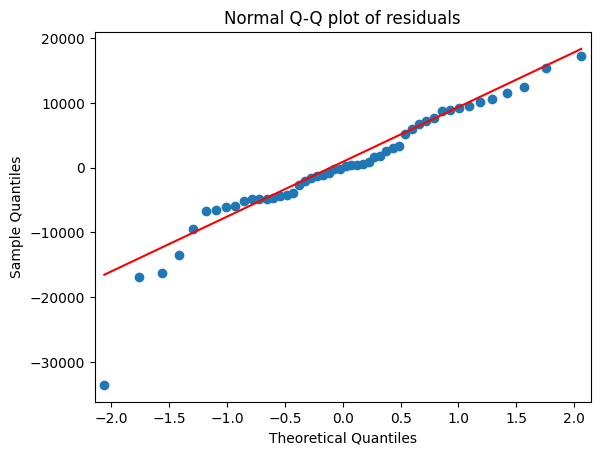

In [51]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid, line='q');
plt.title("Normal Q-Q plot of residuals");

In [52]:
np.where(model.resid<-20000)

(array([49], dtype=int64),)

Text(0, 0.5, 'Cooks Distance')

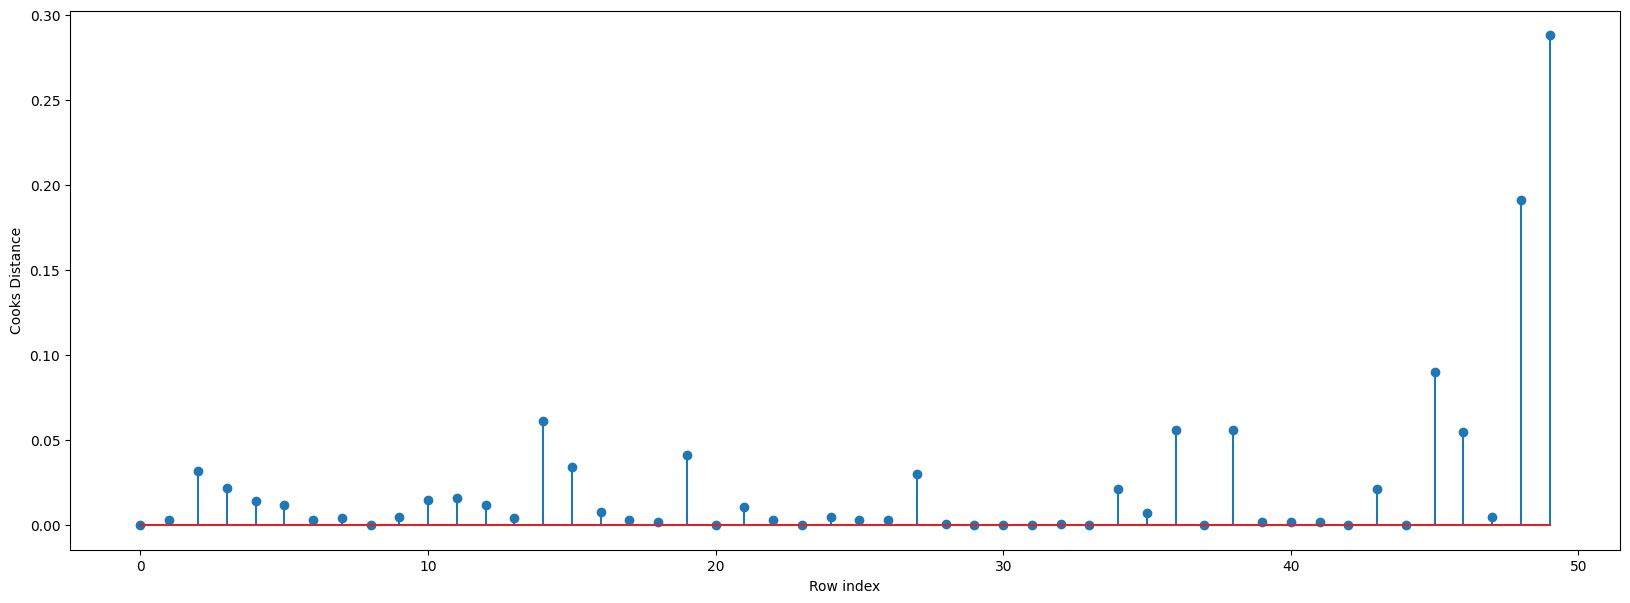

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [54]:
np.argmax(c), np.max(c)

(49, 0.2880822927543264)

Removing outlier point obtained from residual qq plot and cooks distance plot

In [55]:
data2 = data.drop(data.index[49],axis=0)

### Building models on new data

In [56]:
model_rd2 = smf.ols('PR~RD', data=data2).fit()
print(model_rd2.params)
print('rsquared: ',model_rd2.rsquared)
print('adjusted rsquared: ', model_rd2.rsquared_adj)
print('aic: ',model_rd2.aic)

Intercept    51723.694794
RD               0.827841
dtype: float64
rsquared:  0.9573395972488337
adjusted rsquared:  0.9564319291051918
aic:  1021.3600146339439


In [57]:
model_rdms2 = smf.ols('PR~RD+MS', data=data2).fit()
print(model_rdms2.params)
print('rsquared: ',model_rdms2.rsquared)
print('adjusted rsquared: ', model_rdms2.rsquared_adj)
print('aic: ',model_rdms2.aic)

Intercept    49785.269847
RD               0.775384
MS               0.027446
dtype: float64
rsquared:  0.9610856807456628
adjusted rsquared:  0.9593937538215612
aic:  1018.8564801588341


In [58]:
model2 = smf.ols('PR~RD+AD+MS', data=data2).fit()
print(model2.params)
print('rsquared: ',model2.rsquared)
print('adjusted rsquared: ', model2.rsquared_adj)
print('aic: ',model2.aic)

Intercept    52382.439251
RD               0.783002
AD              -0.022201
MS               0.025234
dtype: float64
rsquared:  0.9613162435129847
adjusted rsquared:  0.9587373264138503
aic:  1020.5652974526367


Summarizing results of all models in table

<table>
    <thead>
        <tr>
            <th>model</th>          <th>pvalues</th>        <th>aic</th>                 <th>rsquared</th><th>adjusted rsquared</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>only RD</td>        <td>RD 7.555104e-34</td><td>1021.36001</td>          <td>0.95733</td>          <td>0.95643</td></tr>
        <tr><td rowspan=2>RD+MS</td><td>RD 3.628510e-26</td><td rowspan=2>1018.85648</td><td rowspan=2>0.96108</td><td rowspan=2>0.95939</td></tr>
        <tr>                        <td>MS 4.084443e-02</td>                                             </tr>
        <tr><td rowspan=3>RD+MS+AD</td>  <td>RD 1.971077e-24</td><td rowspan=3>1020.56529</td><td rowspan=3>0.96131</td><td rowspan=3>0.95873</td></tr>
        <tr>                        <td>MS 7.458443e-02</td>                                             </tr>
        <tr>                        <td>AD 6.070728e-01</td>                                             </tr>
    </tbody>
</table>

**So model_rdms2 has lowest aic and highest adjusted rsquared value, So we consider it as our final model.**

#### Residual Plot for Homoscedasticity

Text(0, 0.5, 'Standardized residual values')

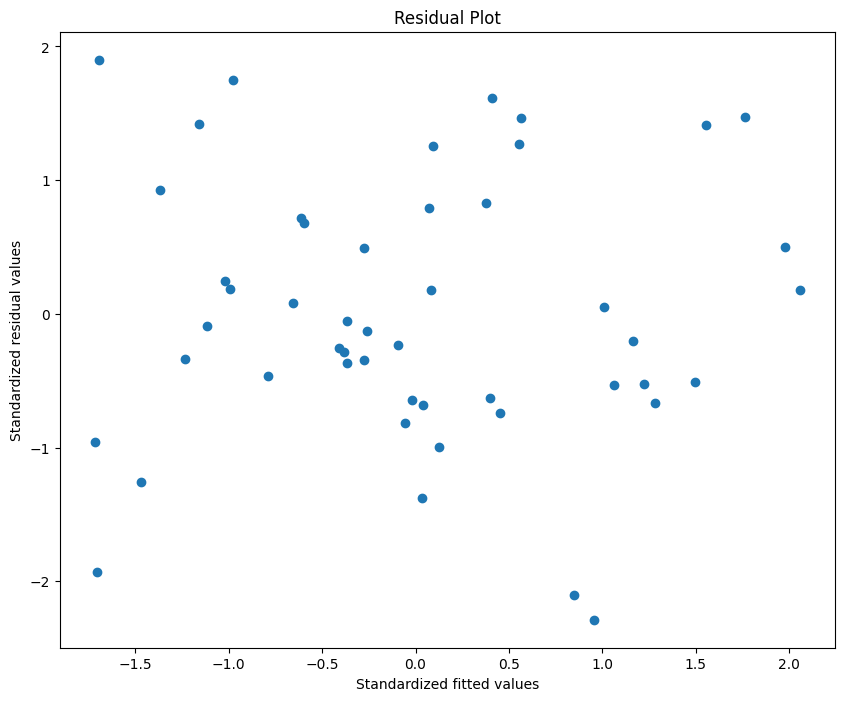

In [59]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

plt.figure(figsize=(10,8))
plt.scatter(get_standardized_values(model_rdms2.fittedvalues), get_standardized_values(model_rdms2.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')

#### Residual vs Regressors

eval_env: 1


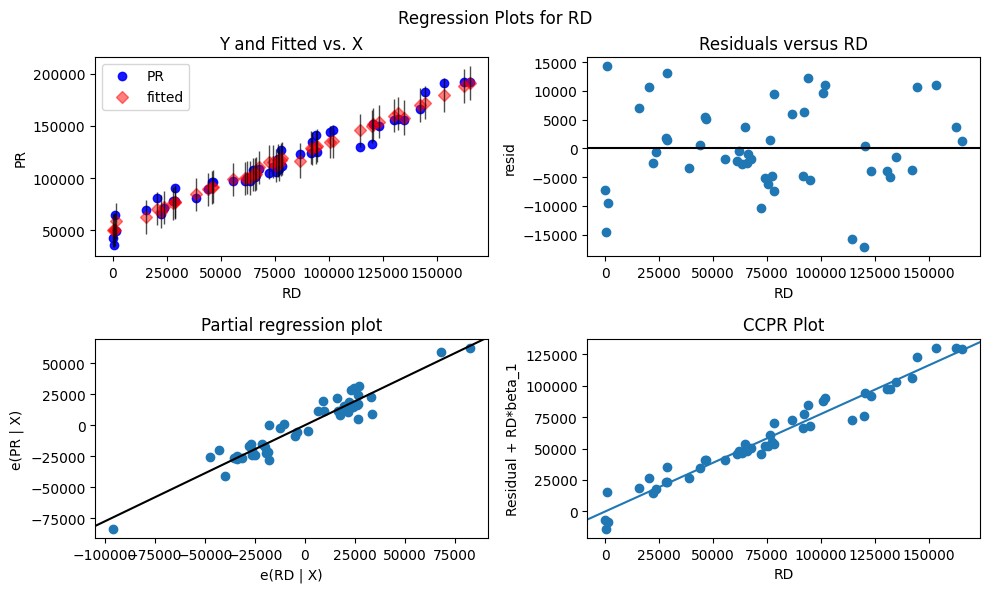

In [60]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model_rdms2,'RD',fig=fig)

eval_env: 1


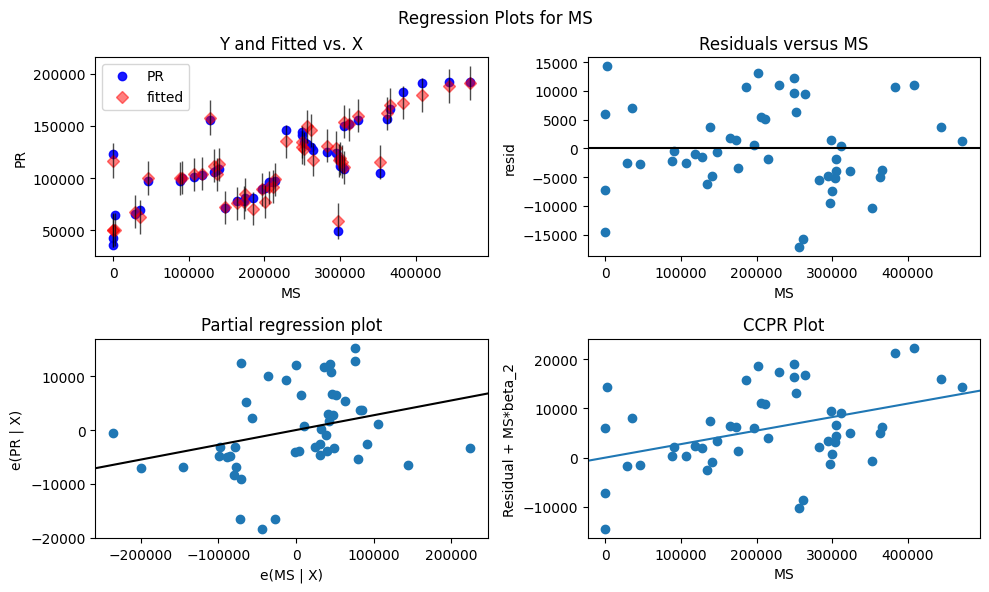

In [61]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model_rdms2,'MS',fig=fig)

#### Cook's Distance

Text(0, 0.5, 'Cooks Distance')

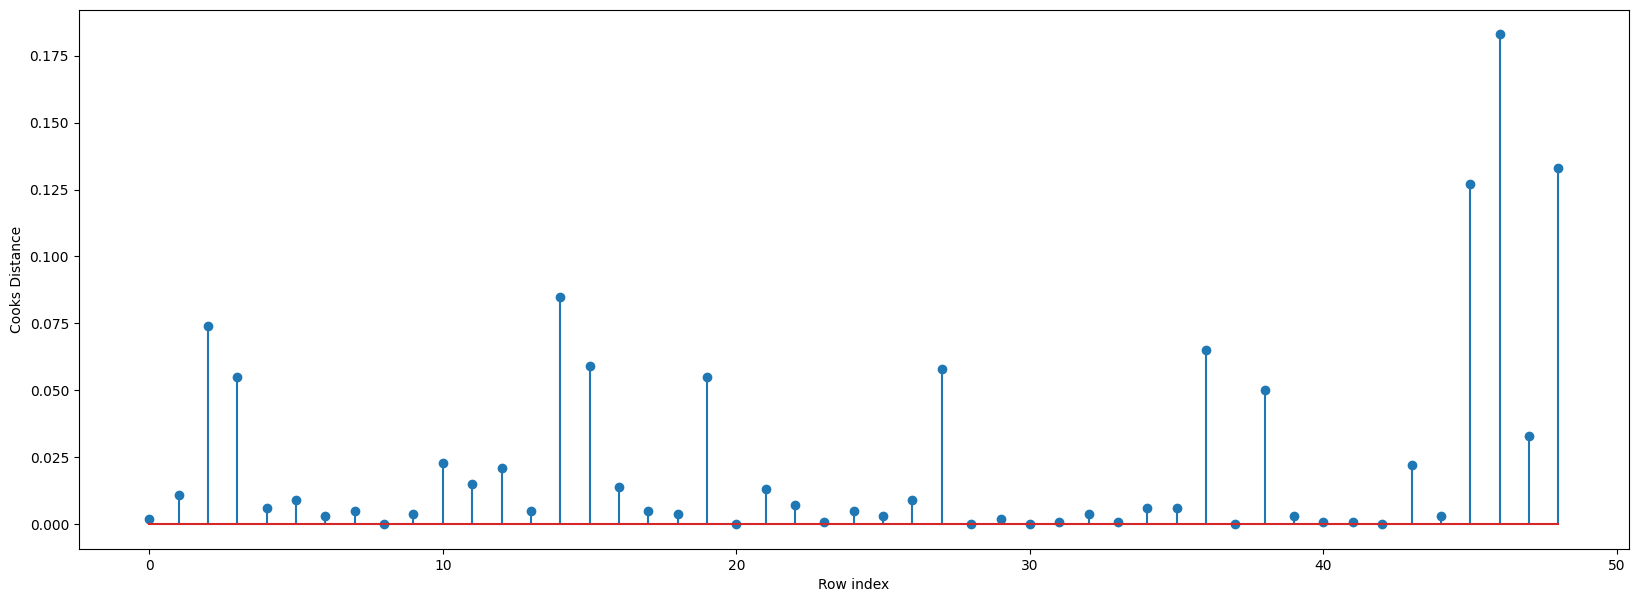

In [62]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model_rdms2.get_influence()
(c, _) = model_influence.cooks_distance

fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data2)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

#### High Influence Points

In [63]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.30612244897959184

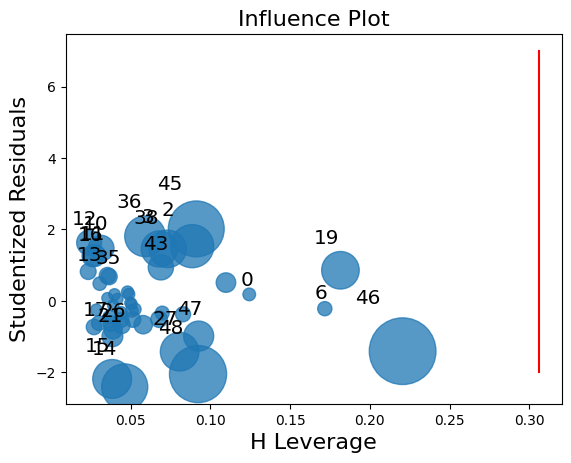

In [64]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_rdms2,alpha=0.5)

y=list(range(-2,8))
x=[leverage_cutoff]*10
plt.plot(x,y,'r')